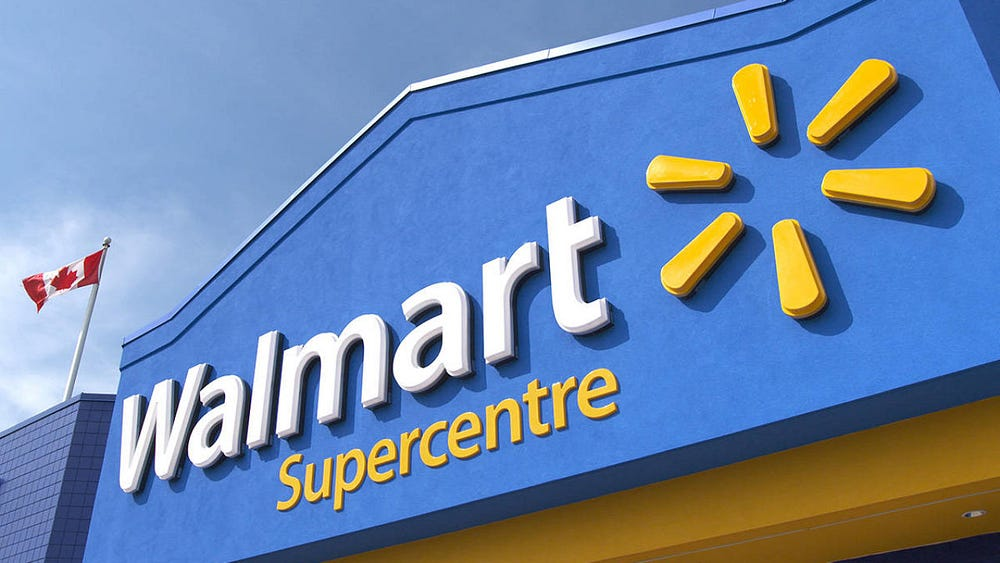

# **Regression Analysis on Walmart Sales: Analyzing the Impact of CPI and Holiday**
## Project: Statistics for Business
---
## Table of Contents

*   Introduction
*   Data Preprocessing
*   Part I: Identify Relationship
*   Part II: Hypothesis Testing
*   Part III: Regression Model
*   Conclusion
*   Reference

# Introduction

Sales are vital for any business, and predicting them accurately is crucial. For a retail giant like Walmart in the US, understanding sales performance is not just important; it's necessary. Imagine having the ability to forecast daily product sales, taking into account economic conditions, holidays, and other influencing factors. This capability could be a game-changer, enabling companies to make smarter decisions and allocate resources more effectively.

In the ever-changing retail landscape, making well-informed decisions is the key to success. We were given an important task: to create a regression model that explores how specific variables - Consumer Price Index (CPI) and Holiday_Flag - affect Walmart's weekly sales, with the hope of achieving more precise sales predictions. This idea comes from noticing that sales go up a lot during holidays.

## Objective

Through this exploration, we aim to address important questions: Do these factors have a significant effect on sales? Can a model built around CPI and Holiday_Flag truly yield accurate sales predictions? With data from 45 Walmart stores, our main goal is to use statistical tests and develop a model to identify the effect of these variables. Our objectives are:

1. Identify the relationships among variables.
2. Conduct hypothesis testing to assess the impact of holidays on sales.
3. Develop regression models to predict sales.

With these objectives, we will be able to analyze and determine whether the model built with these variables can accurately predict the sales or not.

# Data Preprocessing

To get started, let's import our libraries.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats

Now, read in the `Walmart.csv` data. Store it in `df`.

In [64]:
df = pd.read_csv('/content/Walmart.csv', parse_dates=['Date'], dayfirst=True)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


Check the data summary

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## Data Cleaning

Do any of the rows have missing values?

In [66]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

is there any duplicate data?

In [67]:
df.duplicated().sum()

0

## Data Wrangling

Create new columns: `Year`, `Month` and `Day`.

In [68]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


Create a `Season` column since Walmart in the dataset is located in the US

In [69]:
def get_season(month):
    '''this function is to get season according to month column'''
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,Spring


Convert the numerical columns to categorical

In [70]:
df['Holiday_Flag'] = pd.Categorical(df['Holiday_Flag'])
df['Holiday_Flag'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [71]:
# convert the store column to categorical since each value is a unique store number
df['Store'] = pd.Categorical(df['Store'])
df['Store'].dtype

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
, ordered=False)

In [72]:
df['Year'] = pd.Categorical(df['Year'])
df['Month'] = pd.Categorical(df['Month'])
df['Day'] = pd.Categorical(df['Day'])

## Exploratory Data Analysis

How is the descriptive statistics of the data?

In [73]:
df.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


How many unique `store` are in `df`?

In [74]:
df['Store'].nunique()

45

What is the `date` range in the `df`?

In [75]:
date_min = df['Date'].min()
date_min

Timestamp('2010-02-05 00:00:00')

In [76]:
date_max = df['Date'].max()
date_max

Timestamp('2012-10-26 00:00:00')

In [77]:
date_max - date_min

Timedelta('994 days 00:00:00')

How many `Holiday_Flags` total from that `date` range?

In [78]:
holiday_dates = df[df['Holiday_Flag'] == 1].drop_duplicates(subset = 'Date')
holiday_dates['Date']

1     2010-02-12
31    2010-09-10
42    2010-11-26
47    2010-12-31
53    2011-02-11
83    2011-09-09
94    2011-11-25
99    2011-12-30
105   2012-02-10
135   2012-09-07
Name: Date, dtype: datetime64[ns]

Are there any outliers?

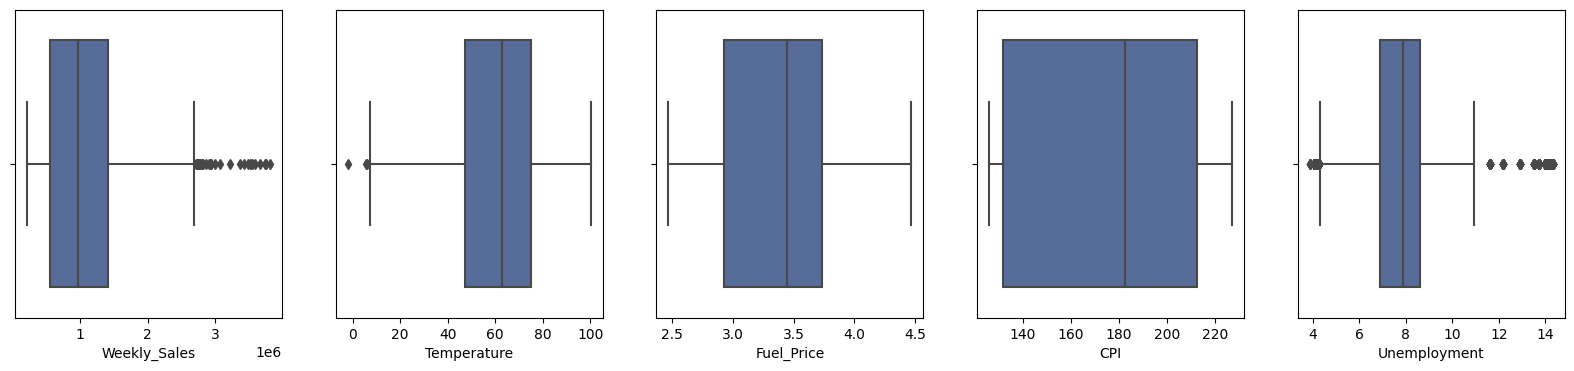

In [79]:
fig , ax = plt.subplots(1, 5, figsize=(20, 4))
cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i, col in enumerate(cols):
    sns.boxplot(df, x=col, ax=ax[i], color = '#4B68A4')
fig.show()

- `Weekly_Sales` distribution is right skewed as it has some outliers.
- `Unemployment` column has outliers that need to be handled.

Examine the distribution of columns related to time.

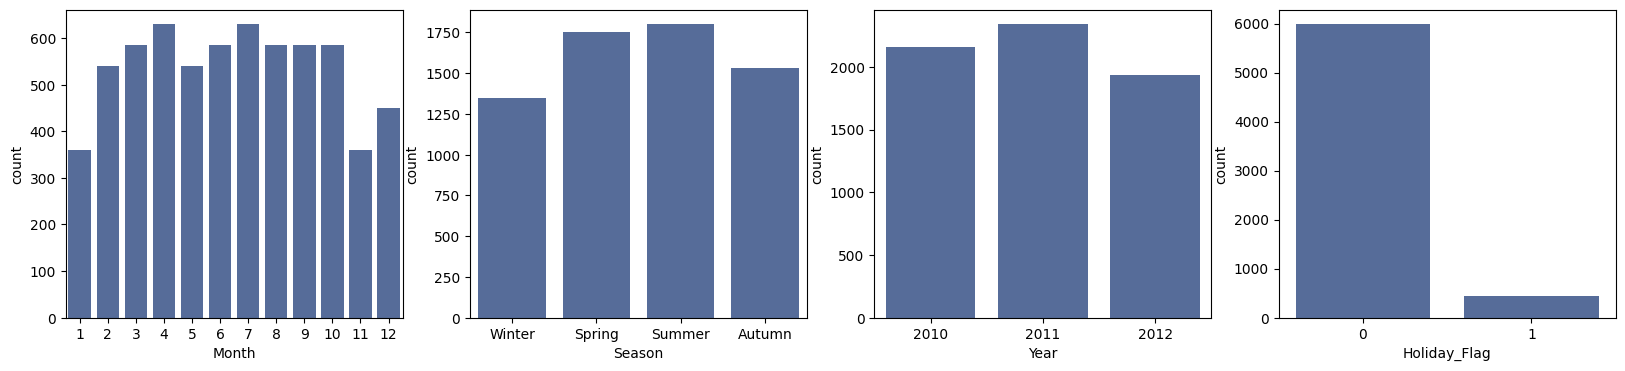

In [80]:
fig , ax = plt.subplots(1, 4, figsize=(20, 4))
time_cols = ['Month', 'Season', 'Year', 'Holiday_Flag']
for i, col in enumerate(time_cols):
    sns.countplot(df, x=col, ax=ax[i], color = '#4B68A4')
fig.show()

Is there a certain time when total sales have a higher value?

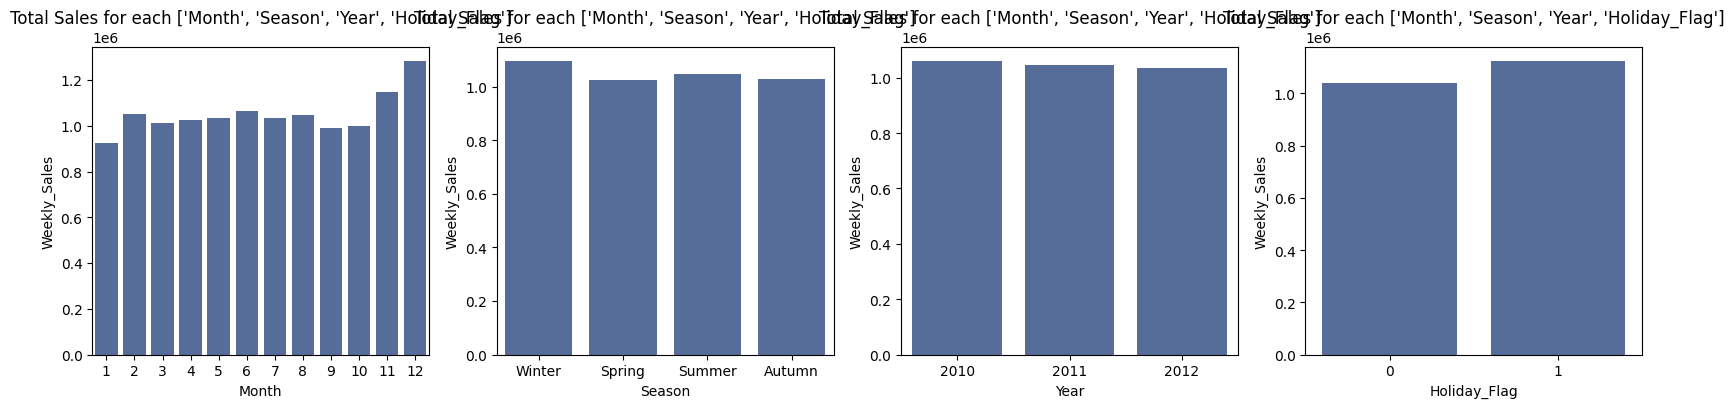

In [81]:
fig , ax = plt.subplots(1, 4, figsize=(20, 4))
time_cols = ['Month', 'Season', 'Year', 'Holiday_Flag']
for i, col in enumerate(time_cols):
    sns.barplot(df, x=col, y='Weekly_Sales', ax=ax[i], errorbar=None, color='#4B68A4')
    ax[i].set_title(f'Total Sales for each {time_cols}')
fig.show()

- Sales counts are lower in the months of November, December, and January, but the total sales are the highest during November and December.
- Similarly, in terms of seasons, sales counts are lower in the winter season, but the total sales are the highest during that season.
- Sales counts are way higher in non-holiday weeks, but the highest total sales occur during holidays, which are observed for only 10 weeks in a year based on the data.

These observations suggest that while there are fewer transactions in certain months and during the winter season, the sales amount per transaction tends to be higher, resulting in higher total sales for those periods. Additionally, the data indicates that holiday weeks, despite being less frequent, generate more revenue, which could be due to increased consumer spending during holidays. Based on this, we assume that the presence of a holiday will indeed have a notable impact on sales, a hypothesis we will test.

Text(0.5, 1.0, 'Sales Trend')

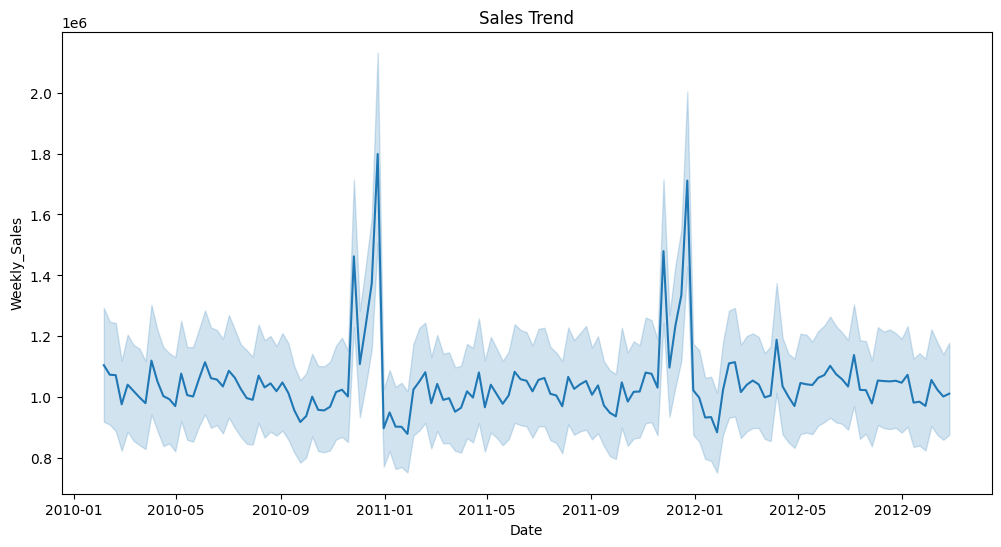

In [82]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Date'], y=df['Weekly_Sales'])
plt.title('Sales Trend')

- As we mentioned before, sales are higher in `months` 11, 12.

Analysis the sales by store

In [83]:
Store = df.groupby(['Store'])['Weekly_Sales'].sum()
Store.head()

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

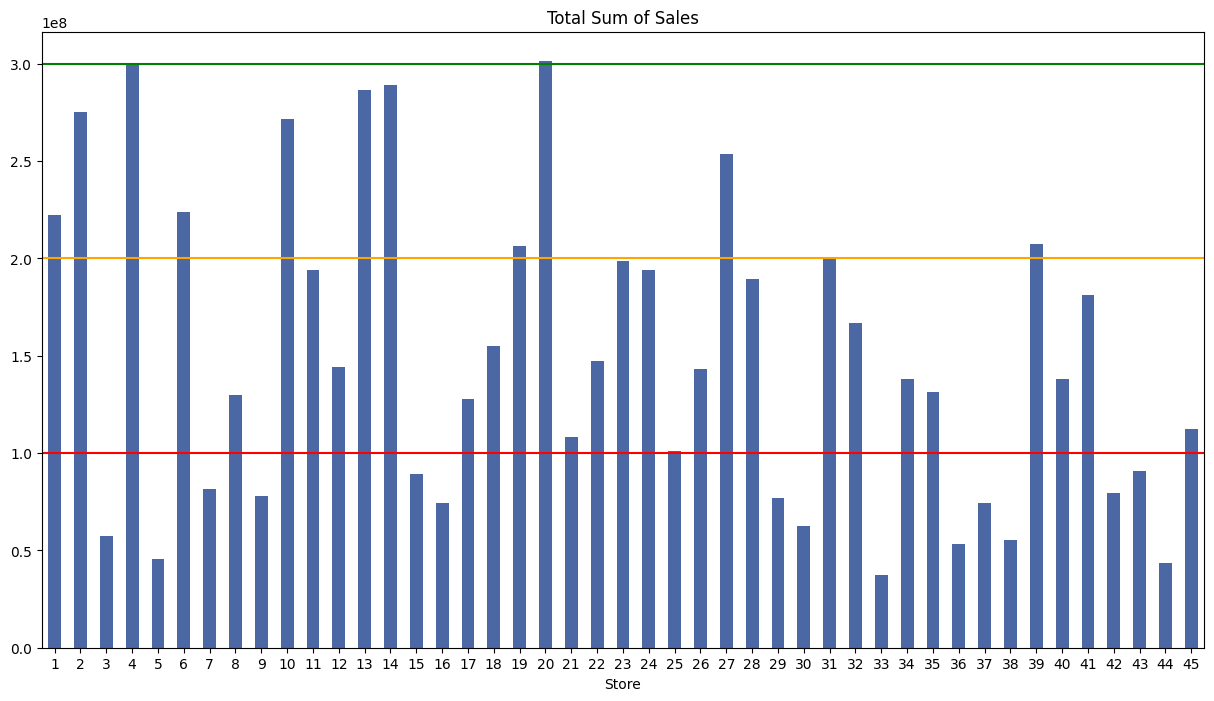

In [84]:
plt.figure(figsize = (15, 8))
Store.plot(kind = 'bar', color = '#4B68A4')
plt.xticks(rotation = 0)
plt.title('Total Sum of Sales')
plt.axhline(y=200000000, color = 'orange')
plt.axhline(y=100000000, color = 'red')
plt.axhline(y=300000000, color = 'green')
plt.show()

- Stores getting total sales below the redline are underperforming
- Stores between red and orange are average
- Stores between orange and green are performing above average
- Stores touching the green line are very well performing

Aggregating sales based on store and holiday flag

In [85]:
# check for total values in Holiday_Flag column
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [86]:
Store_Holiday = df.groupby(['Store', 'Holiday_Flag']).agg({'Weekly_Sales':['mean', 'sum']})
Store_Holiday = Store_Holiday.reset_index()
Store_Holiday

Store Holiday_Flag  Weekly_Sales              
                               mean           sum
0      1            0  1.546957e+06  2.057453e+08
1      1            1  1.665748e+06  1.665748e+07
2      2            0  1.914209e+06  2.545898e+08
3      2            1  2.079267e+06  2.079267e+07
4      3            0  4.000648e+05  5.320862e+07
..   ...          ...           ...           ...
85    43            1  6.359463e+05  6.359463e+06
86    44            0  3.032536e+05  4.033273e+07
87    44            1  2.960356e+05  2.960356e+06
88    45            0  7.821985e+05  1.040324e+08
89    45            1  8.362937e+05  8.362937e+06

[90 rows x 4 columns]

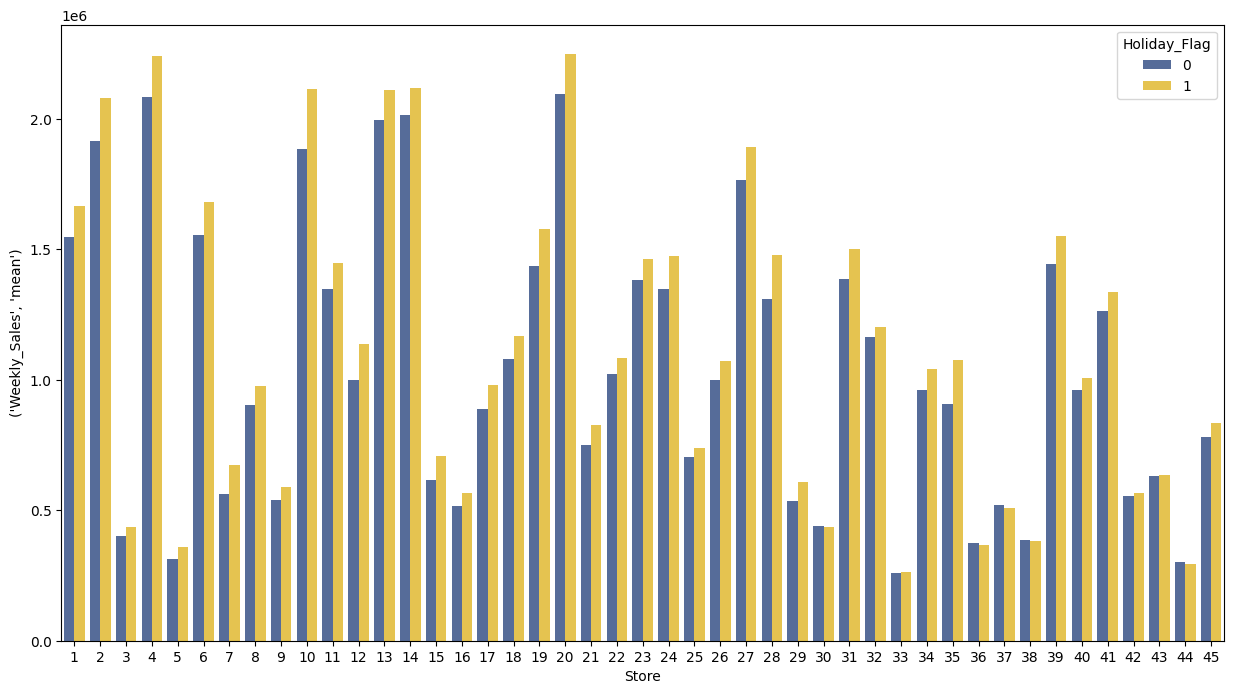

In [87]:
plt.figure(figsize=(15, 8))
palette = sns.color_palette(['#4B68A4', '#FED137'])
sns.barplot(x = 'Store', y = ('Weekly_Sales', 'mean'), hue= 'Holiday_Flag', data=Store_Holiday, palette=palette)
plt.show()

- As commonly known, people tend to spend more money during holidays in almost all stores.

Before conducting hypothesis testing and building models, handling outliers is essential to ensure the robustness and reliability of our analysis and predictions.

In [88]:
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']
for feature in features:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  iqr = q3-q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  df = df[(df[feature] >= lower) & (df[feature] <= upper)]

df.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,5.923000e+03,5923.000000,5923.000000,5923.000000,5923.000000
mean,1.041038e+06,60.409046,3.340349,175.005846,7.721439
std,5.543193e+05,18.397096,0.458072,39.024239,1.243295
min,2.099862e+05,7.460000,2.472000,126.064000,4.308000
25%,5.527446e+05,46.945000,2.889000,132.763355,6.891000
50%,9.478151e+05,62.590000,3.417000,190.006988,7.852000
75%,1.428915e+06,74.715000,3.720500,213.791715,8.494000
max,2.760347e+06,100.140000,4.468000,227.232807,10.926000


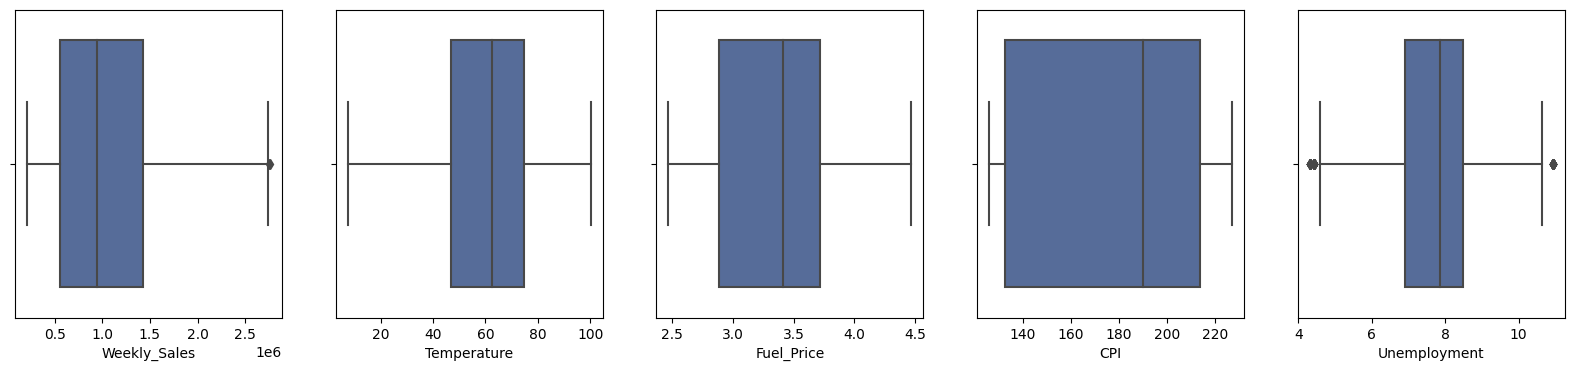

In [89]:
fig , ax = plt.subplots(1, 5, figsize=(20, 4))
cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i, col in enumerate(cols):
    sns.boxplot(df, x=col, ax=ax[i], color = '#4B68A4')
fig.show()

# Part I: Identify Relationship

After completing data preprocessing and exploratory data analysis, we are now ready to investigate the relationships between variables. Our primary objective is to identify whether it is true that the CPI and holiday variables most influence our target variable, Weekly_Sales, or if there are other variables with higher correlations.

How is the correlation between columns in relation to `Weekly_Sales`?

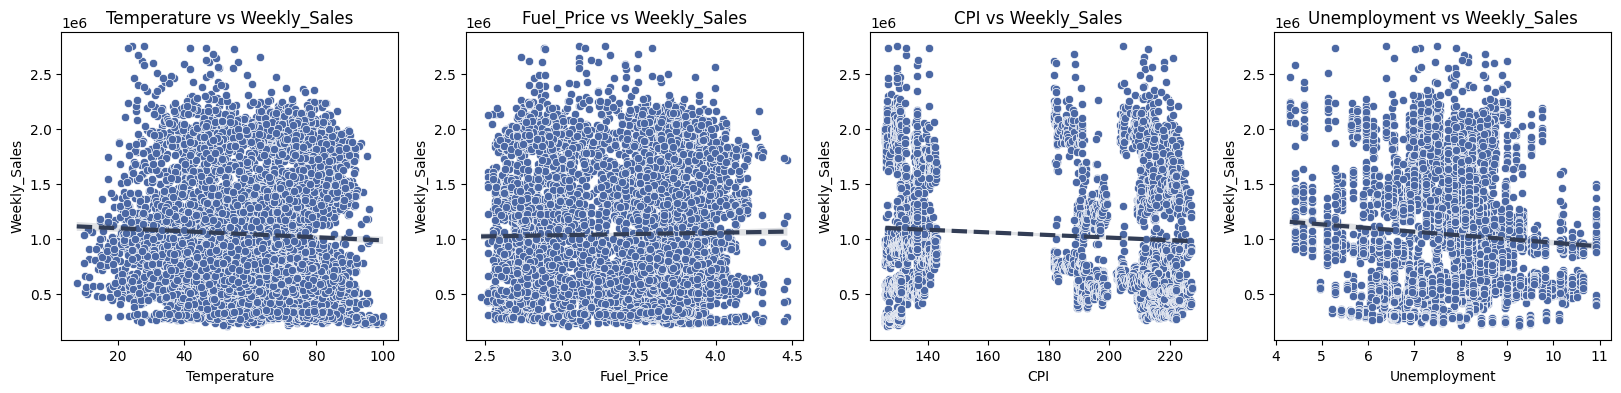

In [90]:
fig , ax = plt.subplots(1, 4, figsize=(20, 4))
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i, col in enumerate(cols):
  sns.scatterplot(df, y='Weekly_Sales', x=col, ax=ax[i], color = '#4B68A4')
  sns.regplot(df, y='Weekly_Sales', x=col, ax=ax[i], scatter=False, color='#323D55', line_kws={'linewidth': 3, 'linestyle': '--'})
  ax[i].set_title(f'{col} vs Weekly_Sales')
fig.show()

- At first glance, there are no significant correlation coefficients between variabels.
- The data points appear to be scattered rather randomly, indicating that the variables may not have a strong linear association with sales.

Could the three distinct clusters in the scatter plot of CPI and Weekly Sales be attributed to yearly patterns in CPI values?

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

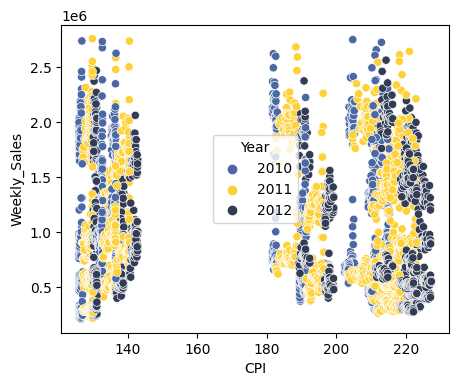

In [91]:
plt.figure(figsize=(5, 4))
sns.scatterplot(df, y='Weekly_Sales', x='CPI', hue = 'Year', palette = ['#4B68A4', '#FED137', '#323D55'])

- It appears that there are data points from all three respective years from each clusters.

<Axes: >

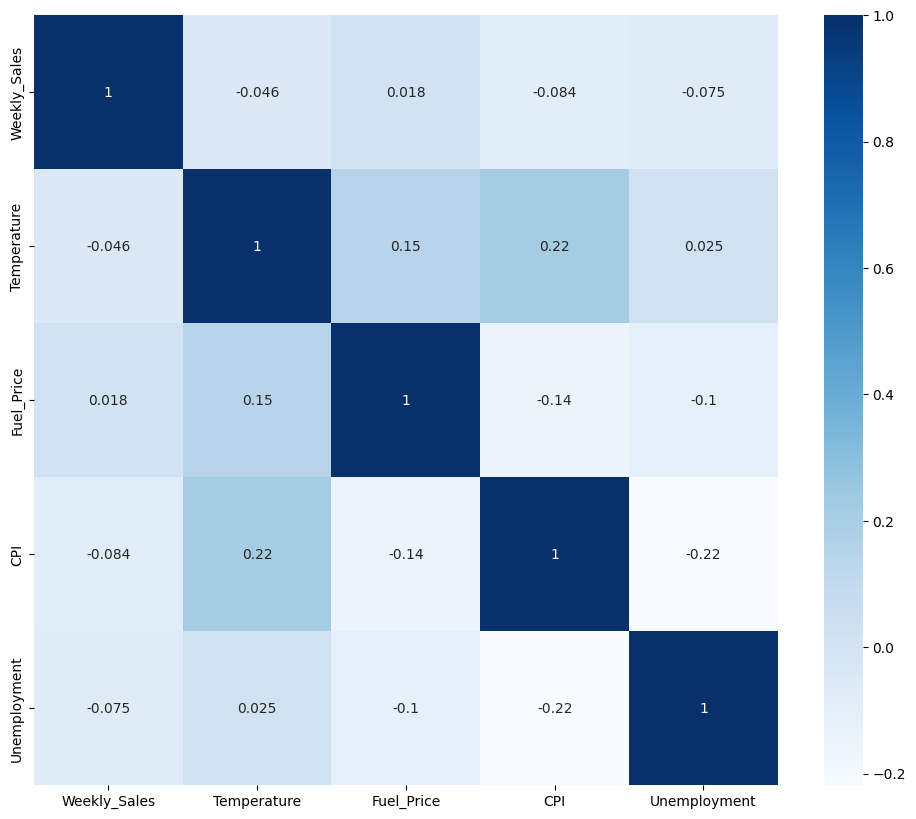

In [92]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', annot=True)

- There isn't a significant correlation between the variables and Weekly_Sales.
- But, it is true that the highest correlations are with CPI (-0.084), followed by Unemployment (-0.075).

# Part II: Hypothesis Testing

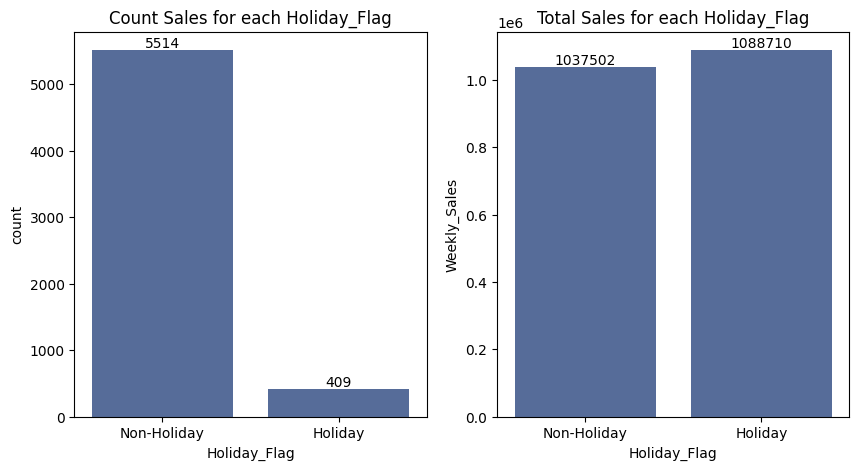

In [93]:
fig , ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(df, x='Holiday_Flag', ax=ax[0], color = '#4B68A4')
ax[0].set_title('Count Sales for each Holiday_Flag')
ax[0].set_xticklabels(['Non-Holiday', 'Holiday'])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

sns.barplot(df, x='Holiday_Flag', y='Weekly_Sales', ax=ax[1], errorbar=None, color='#4B68A4')
ax[1].set_title('Total Sales for each Holiday_Flag')
ax[1].set_xticklabels(['Non-Holiday', 'Holiday'])
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

fig.show()

During the EDA process, it was observed that sales counts are way higher in non-holiday weeks. However, the highest total sales occur during holidays, which are observed for only 10 weeks in a year based on the data. It indicates that holiday weeks, despite being less frequent, generate more revenue. This could be attributed to increased consumer spending during holidays. This would lead us to believe that there is a significant impact of holiday weeks on the sales.

With these insights in mind, we are trying to prove by performing hypothesis testing to examine whether the presence of holiday events significantly impacts Walmart's sales.

**Define the null dan alternate hypothesis:**
```
𝐻0: 𝜇_Holiday = 𝜇_Non_Holiday
𝐻1: 𝜇_Holiday ≠ 𝜇_Non_Holiday
```
- `𝐻0` : There is no significant difference between holiday week and non-holiday week sales.
- `𝐻1` : There is a significant difference between holiday week and non-holiday week sales.

Although we have large samples (both groups have more than 30 observations), assume we don't know about the population standard deviation (𝜎), so we would use a two-tail test by using a two-sample t-test instead of z-test.

In [94]:
# sales on holiday weeks
holiday_sales = df[df['Holiday_Flag']==1]['Weekly_Sales'].values

# sales on non-holiday weeks
non_holiday_sales = df[df['Holiday_Flag']==0]['Weekly_Sales'].values

# variance
np.var(holiday_sales), np.var(non_holiday_sales)

(341596357495.04456, 304486961863.61725)

Based on the result, we can see that the variance is not equal for both the samples. Afterward, we can calculate statistics test and p-value.

In [95]:
t_stat, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)
print(f't_statistics value: {t_stat}')
print(f'p-value: {p_value}')

t_statistics value: 1.7141218087769603
p-value: 0.08717495799833262


The next step is to make decision rules by which we can know our hypothesis will be either rejected or fail to reject.

In [96]:
# the significance level is 0.05, commonly used in statistical analysis.
alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis")
else:
  print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


**Observations:**

- We have calculated something called the P-Value. The p-value (0.087) signifies the probability of obtaining results as extreme or more extreme than the observed results, assuming the null hypothesis is true. In other words, it indicates the strength of evidence against the null hypothesis in a statistical test.
- Typically we would expect the p-Value to be lower than the level of alpha (0.05). The alpha indicates the percentage chance of committing a Type I error if the null is true.
- In our case, a p-value of 0.087 means that if the null hypothesis is true (i.e., if there is no significant difference between holiday week and non-holiday week sales), there is an approximately 8.7% probability of getting results as extreme or more extreme than what was observed.
- Therefore, given the p-Value 0.087, as such, we fail to reject the null hypothesis (`𝐻0`) and conclude that there is not enough statistical evidence to claim that there is a significant difference in sales between holiday weeks and non-holiday weeks.

# Part III: Regression Modelling

The primary objective of creating regression models is to understand and quantify the relationships between various factors and a specific outcome of interest. In this context, the focus is to find out whether the model built around CPI and Holiday_Flag truly yields accurate sales predictions or not.

Use `.params` to access the estimated coefficients and `.bse` to access the standard errors of the estimated coefficients, and combine these results into a single table for convenience.

In [97]:
def coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=['coef', 'std err'])
    return df

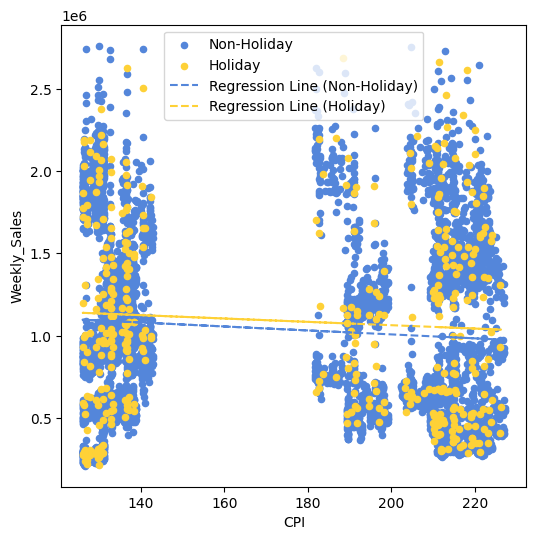

In [98]:
fig, ax = plt.subplots(figsize=(6, 6))

colors = {1:'#FED137', 0:'#5486DA'}

grouped = df.groupby('Holiday_Flag')

# Plot the data with different color
for key, group in grouped:
    holiday_status = 'Holiday' if key == 1 else 'Non-Holiday'
    group.plot(ax=ax, kind='scatter', x='CPI', y='Weekly_Sales', label=holiday_status, color=colors[key])

# Calculate the linear regression line for each group
for key, group in grouped:
    x = group['CPI']
    y = group['Weekly_Sales']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    holiday_status = 'Holiday' if key == 1 else 'Non-Holiday'
    plt.plot(x, intercept + slope*x, color=colors[key], linestyle='--', label=f'Regression Line ({holiday_status})')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

- The slopes do not significantly differ between sub-data.
- It is indeed true that the regression line for holidays tends to be higher than non-holidays, but the difference is not very noticeable.

In [99]:
# Create OLS model object
model = smf.ols("Weekly_Sales ~ CPI + Holiday_Flag", df)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_Holiday_Flag_CPI_Weekly_Sales = coef_std_err(results)
results_Holiday_Flag_CPI_Weekly_Sales

,coef,std err
Intercept,1.246052e+06,33034.604618
Holiday_Flag[T.1],5.114787e+04,28304.502267
CPI,-1.191651e+03,183.912413


We could get the following regression equation:
```
Weekly_Sales = 1,246,052 - 1,191 CPI + 51,147 Holiday_Flag
```
**Coefficient**
- The model predicts that the Weekly_Sales, when CPI is 0 and on non-holiday week, will be $1,246,052.
- For every 1 point change in CPI, and on non-holiday too, we expect a decrease of approximately 1,191 in Weekly_Sales.
- When it change from non-holiday week to holiday week, and the CPI remain the same, we anticipate an increase of approximately 51,147 in Weekly_Sales.

**Standard Error**
- The standard errors indicate large values, particularly for the intercept and Holiday_Flag[T.1].
- This suggests that there might be considerable variability or noise in the data for these variables.

Provide the summary of our model below:

In [100]:
results_summary = results.summary()
print(results_summary.as_text())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     22.63
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           1.62e-10
Time:                        15:32:10   Log-Likelihood:                -86716.
No. Observations:                5923   AIC:                         1.734e+05
Df Residuals:                    5920   BIC:                         1.735e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.246e+06    3.3e+0

**p-value**

- The p-value assesses the statistical significance of a regression coefficient.
- Typically, if the p-value < 0.05, the coefficient is considered statistically significant.
- The p-value is 1.62e-10, which is considerably less than 0.05.
- This suggests that the predictor variables in this model have a significant impact on the target variable, Weekly_Sales.

**R-squared**
- The R-squared measures how well the predictor variables explain the variation in the target variable.
- Its values range between 0 and 1. A higher value indicates that the predictors do a better job of explaining the variation in the target.
- The generated R-squared value of 0.008 suggests that this multiple linear regression model falls short in adequately explaining the target's variation.
- In simpler terms, only about 0.8% of the target's variation can be explained by this model.

# Conclusion

In conclusion, the analysis revealed that while CPI shows the highest correlation with Weekly_Sales, the relationship is quite weak. This indicates that changes in the Consumer Price Index (CPI) may not be the most influential factor in predicting Weekly_Sales. Other variables or external factors may play a more substantial role in driving sales figures. It's crucial to consider these potential factors in future analyses to build a more accurate predictive model.

Additionally, after conducting hypothesis testing, there wasn't sufficient evidence to claim that Holiday_Flag significantly affects Weekly_Sales. This suggests that, based on the data and statistical analysis, we cannot confidently state that the presence of a holiday significantly impacts the weekly sales figures.

The model constructed using CPI and Holiday_Flag as predictors demonstrated lack performance. The chosen model, relying on CPI and Holiday_Flag, does not achieve accurate predictions of Weekly_Sales. The model may not effectively capture the complexity of the relationship between these variables and the sales.

## Recommendation

Conduct further in-depth analysis to construct a more accurate, effective and reliable model. This can be achieved through the inclusion of additional relevant variables and the implementation of advanced modeling techniques. By broadening the scope of factors considered and leveraging advanced methodologies, we can enhance the model's predictive accuracy.


---

Due to time constraints (the project deadline is very close) and my limited knowledge regarding regression models, I hope to dedicate more time to learning and refining my skills. This way, I aim to build a more accurate predictive model in the future.

Thank you very much for your attention, and I greatly appreciate any advice or input from all of you.

Connect with me:

- Email: farizalfitraaa@gmail.com
- Linkedin: https://www.linkedin.com/in/farizalfitra/
- Github: https://github.com/alfitraaa/Walmart_Regression_Model
- Portfolio: https://alfitraaa.github.io/FarizAlfitra.github.io/
- Medium: https://medium.com/@farizalfitraaa/regression-analysis-on-walmart-sales-analyzing-the-impact-of-cpi-and-holiday-d68586a728b7

# Reference

Grant. 2019, 'Udacity_Data_Analysis_Nanodegree', GitHub, https://github.com/patiegm/Udacity_Data_Analysis_Nanodegree/blob/dfda1b6e45e23a1214dd1e6111a9965c779f7299/Analyze%20AB%20Test%20Results/Analyze_ab_test_results_notebook.ipynb